<a href="https://colab.research.google.com/github/avisruti/AI-ML/blob/main/space_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df_train = pd.read_csv('train.csv')

In [43]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [44]:
df_train.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [46]:
df_train.shape

(8693, 14)

In [47]:
df_train.columns.values

array(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported'], dtype=object)

In [84]:
df_train.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [49]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [50]:
df_train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [4]:
df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0],inplace=True)

In [5]:
df_train['CryoSleep'].fillna(df_train['CryoSleep'].mode()[0],inplace=True)

In [6]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)

In [7]:
df_train['Destination'].fillna(df_train['Destination'].mode()[0],inplace=True)

In [8]:
df_train['VIP'].fillna(df_train['VIP'].mode()[0],inplace=True)

In [9]:
df_train['RoomService'].fillna(df_train['RoomService'].median(),inplace=True)
df_train['FoodCourt'].fillna(df_train['FoodCourt'].median(),inplace=True)
df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].median(),inplace=True)
df_train['Spa'].fillna(df_train['Spa'].median(),inplace=True)
df_train['VRDeck'].fillna(df_train['VRDeck'].median(),inplace=True)



In [91]:
df_train.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,199
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [10]:
label_encoder =LabelEncoder()
cat_cols =['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
for col in cat_cols:
  df_train[col]=label_encoder.fit_transform(df_train[col])

In [11]:
#for clustering
features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X = df_train[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
#Kmean
kmeans = KMeans(n_clusters=4, random_state=42)  # Choosing 4 clusters as an example
df_train['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate clustering
silhouette_avg = silhouette_score(X_scaled, df_train['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Show the first few rows with cluster labels
print(df_train.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.23862493674125532
  PassengerId  HomePlanet  CryoSleep  Cabin  Destination   Age  VIP  \
0     0001_01           1          0    149            2  39.0    0   
1     0002_01           0          0   2184            2  24.0    0   
2     0003_01           1          0      1            2  58.0    1   
3     0003_02           1          0      1            2  33.0    0   
4     0004_01           0          0   2186            2  16.0    0   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  Cluster  
0        False        2  
1         True

In [13]:
import matplotlib.pyplot as plt

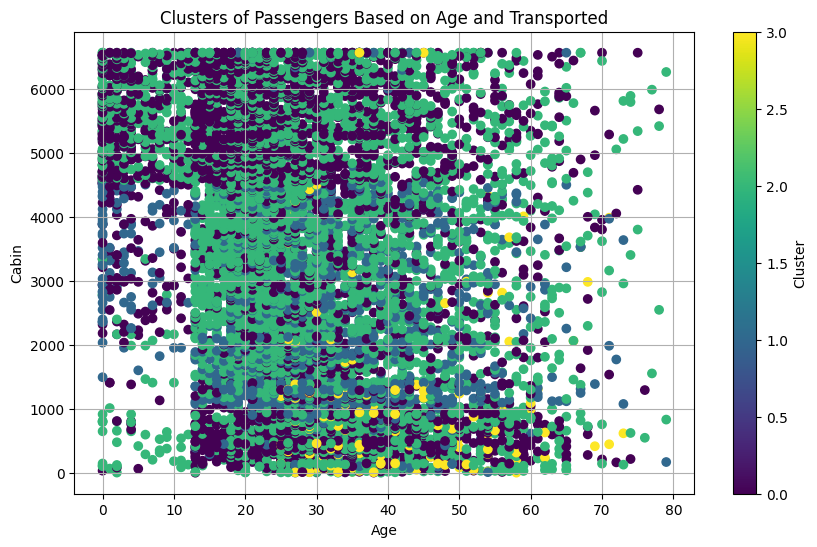

In [21]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_train['Age'], df_train['Cabin'], c=df_train['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters of Passengers Based on Age and Transported')
plt.ylabel('Cabin')
plt.xlabel('Age')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [61]:
X=df_train.drop(columns= ['Transported','Name'])
y=df_train['Transported']

In [62]:
X_train,X_val,y_train,y_val =train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
2333,2513_01,0,0,6560,2,28.0,0,0.0,55.0,0.0,656.0,0.0
2589,2774_02,0,0,3952,2,17.0,0,0.0,1195.0,31.0,0.0,0.0
8302,8862_04,1,1,932,0,28.0,0,0.0,0.0,0.0,0.0,0.0
8177,8736_02,2,0,3333,2,20.0,0,0.0,2.0,289.0,976.0,0.0
500,0539_02,1,1,719,0,36.0,0,0.0,0.0,0.0,0.0,0.0


In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [67]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
y_pred=model.predict(X_val)

In [69]:
y_pred

array([False, False,  True, ..., False,  True, False])

In [71]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.7642323174238068
              precision    recall  f1-score   support

       False       0.78      0.73      0.75       861
        True       0.75      0.80      0.77       878

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



In [72]:
df_test = pd.read_csv('test.csv')

In [75]:
df_test.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,100
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [74]:
df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0],inplace=True)
df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode()[0],inplace=True)
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test['Destination'].fillna(df_test['Destination'].mode()[0],inplace=True)
df_test['VIP'].fillna(df_test['VIP'].mode()[0],inplace=True)
df_test['RoomService'].fillna(df_test['RoomService'].median(),inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].median(),inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].median(),inplace=True)
df_test['Spa'].fillna(df_test['Spa'].median(),inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].median(),inplace=True)

In [79]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,1,1,1,1,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,1,0,1,1,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,1,1,1,1,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,1,0,1,1,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,1,0,1,1,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [80]:
for col in cat_cols:
    df_test[col] = label_encoder.transform(df_test[col])

X_test = df_test.drop(columns=['Name'])
X_test = scaler.transform(X_test)

# Predict on the test set
test_predictions = model.predict(X_test)

In [81]:
test_predictions

array([ True, False,  True, ...,  True,  True,  True])